In [1]:
### Load Video, Detection and Segementation Model

from body_matrix import load, infer, process, score, draw, export

video, frames_counts, fps, sample_frame = load.video(
    video_path="/Users/troydo42/Desktop/Raw_Vids/VID_20230109_114329~2.mp4", 
    rotate_angle=-90, 
    frame_position=1
)

print(frames_counts)

54


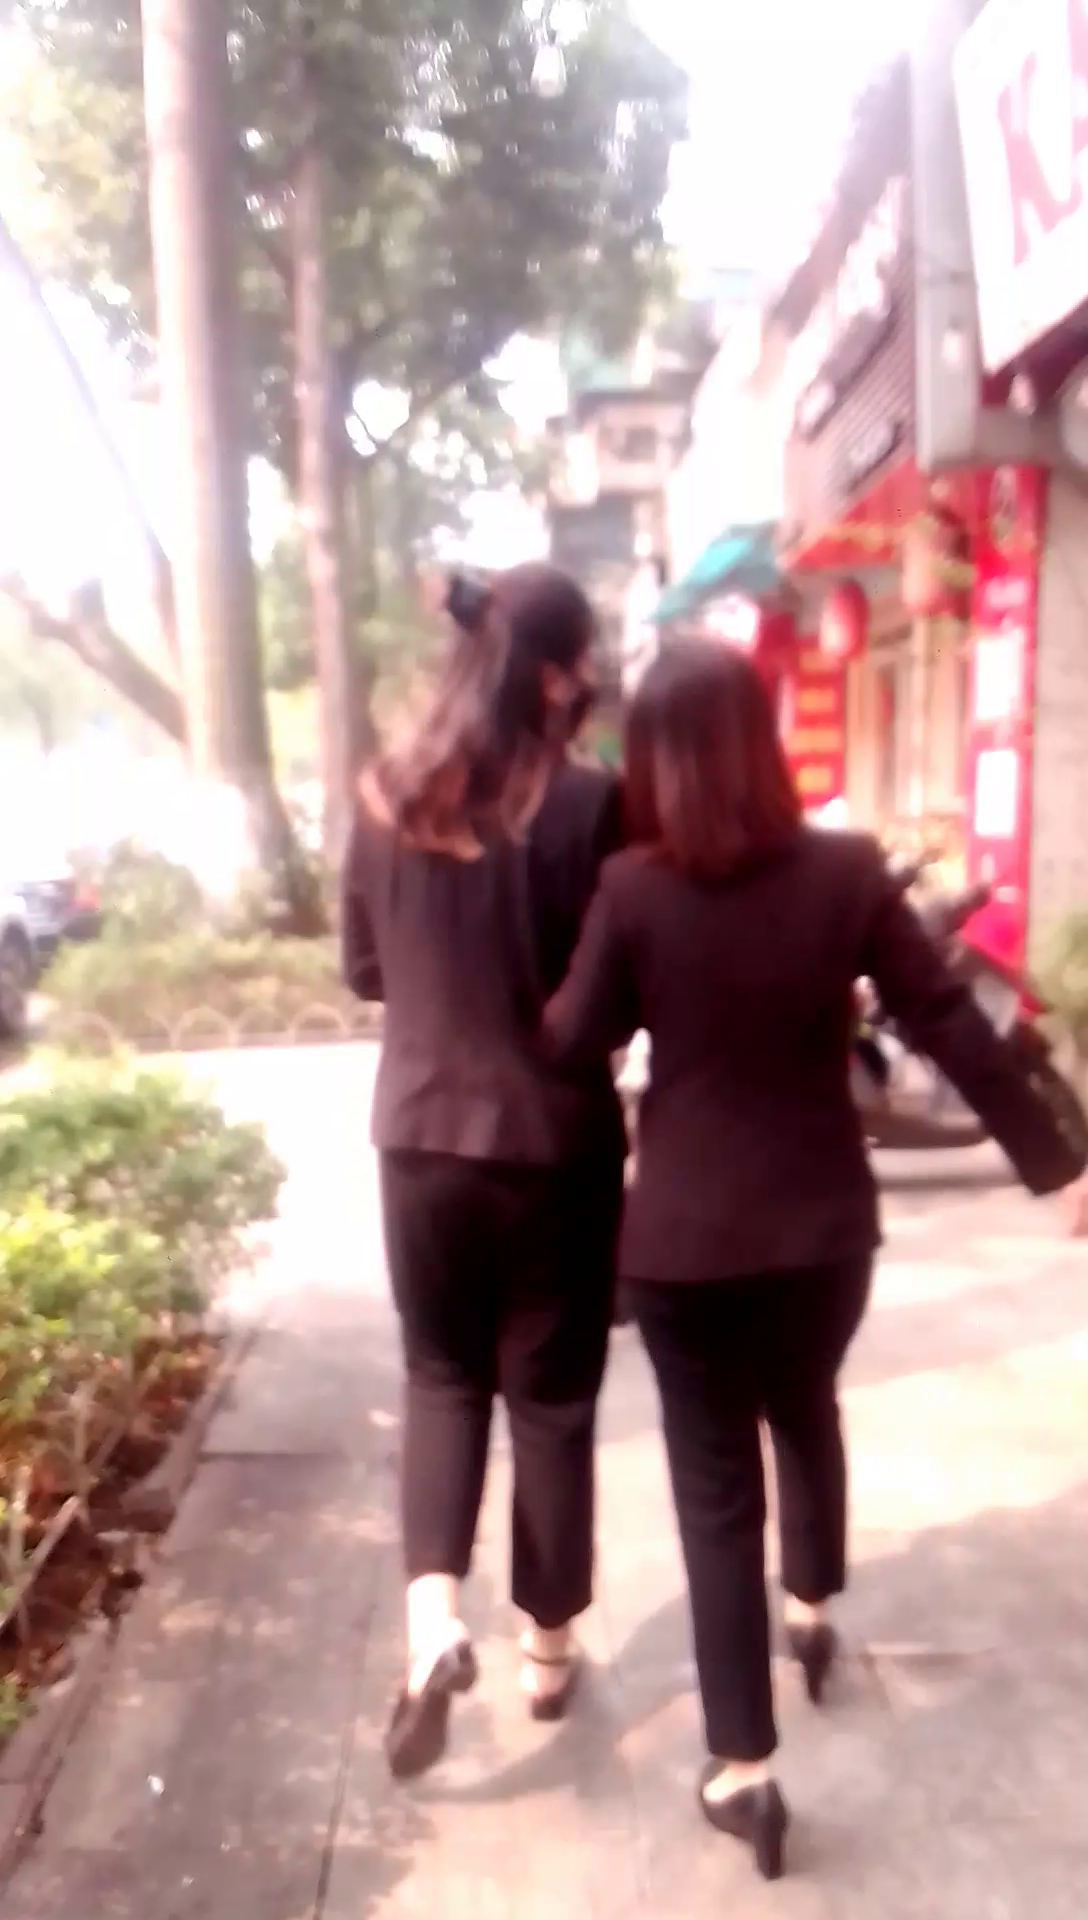

In [2]:
sample_frame

In [3]:
keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
	sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

Found  3  person in the frame
Distances:  [244.42062377929688, 60.22381591796875, 487.51758670806885]
Areas:  [584058.953406807, 355412.4019498527, 24124.33459354425]
FOCUSES:  [2389.5649408627296, 5901.525775682535, 49.48402939972333]
Select keypoint index 1


In [4]:
segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
	sample_frame, "cpu", selected_box, 0.99, segment_model, segment_transform
)

Found  2  person in the frame
[525.63818359375, 613.36279296875, 1081.5325927734375, 1874.3065185546875]
[333.0712890625, 552.6142578125, 634.4810791015625, 1731.781005859375]
[338.4769287109375, 550.0221557617188, 633.4747924804688, 1761.1962890625]
[333.0712890625, 552.6142578125, 634.4810791015625, 1731.781005859375]
[335.571172272835, 13.590781381056127]
13.590781381056127 1


In [5]:
selected_kps = process.keypoints_filter(
    [
        'left_ear', 'right_ear',
        'left_shoulder','right_shoulder',
        'left_wrist','right_wrist',
        'left_hip', 'right_hip',
        'left_ankle', 'right_ankle'
    ],  
    keypoints
)

scores, measures = score.frame_SHA_score(
    sample_frame, bool_mask, selected_kps
)

segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

hip_kps = process.find_hip_points(
    selected_kps['left_hip'], 
    selected_kps['right_hip'],
    selected_kps['left_wrist'],
    selected_kps['right_wrist'],
    segment_area
)

In [6]:
output = draw.add_thong(
    score=scores, 
    lh=hip_kps['left_hip'], 
    rh=hip_kps['right_hip'], 
    frame=sample_frame, 
    font_file="/content/drive/MyDrive/Body_Matrix/Roboto-Bold.ttf"
)

12


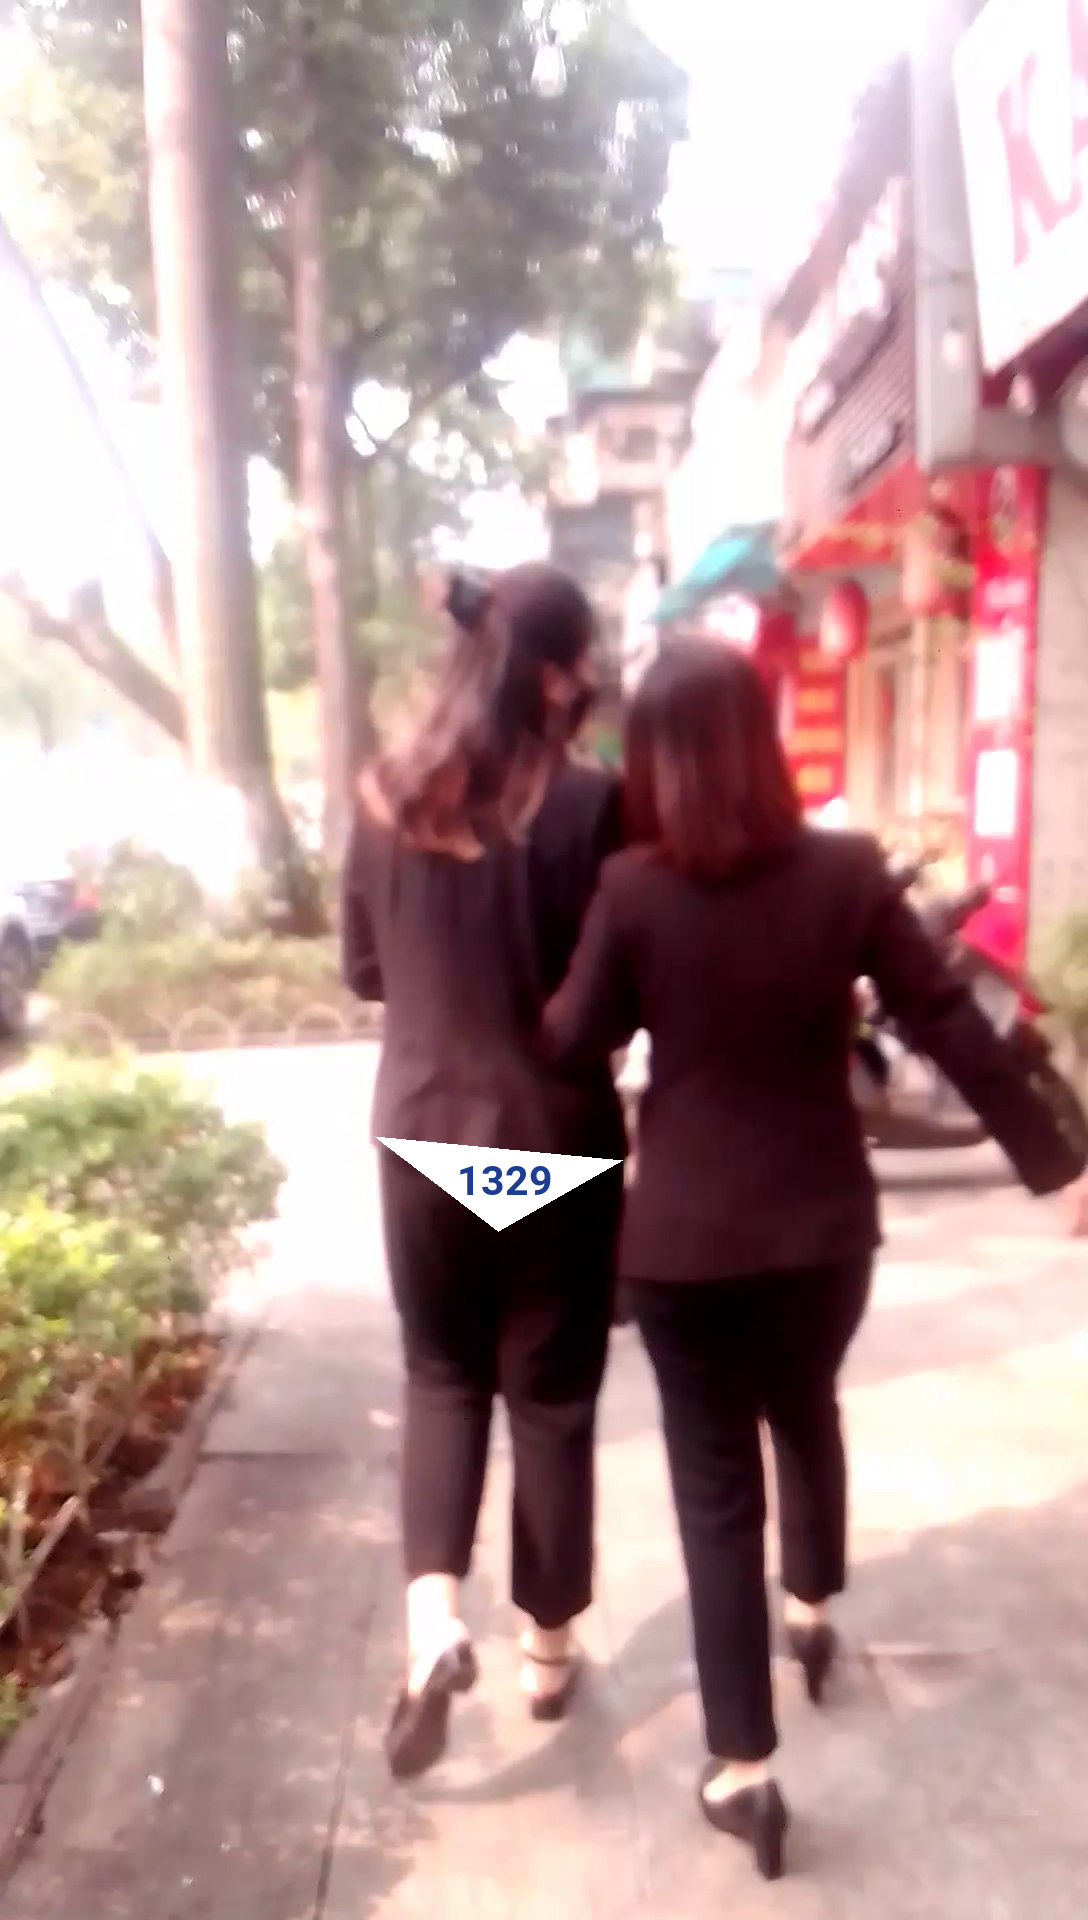

In [7]:
output